<a href="https://colab.research.google.com/github/KishoreR1/IrisKish/blob/main/Titanic_AssgnmtKish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd



In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Libraries imported successfully!


In [2]:
from google.colab import files
uploaded = files.upload()


Saving titanic.zip to titanic.zip


In [3]:
import zipfile
import io

In [5]:
zip_filename = next(iter(uploaded))
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()

In [6]:
import pandas as pd

In [8]:
print(zip_ref.namelist())


['gender_submission.csv', 'test.csv', 'train.csv']


In [9]:
import zipfile

zip_filename = next(iter(uploaded))  # Get the uploaded zip file name
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()


In [14]:

# Get descriptive statistics of numerical columns
titanic.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
# Check unique values in 'Sex', 'Embarked' etc.
titanic['Sex'].value_counts()
titanic['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77


In [16]:
df = pd.read_csv('train.csv')

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


The dataset is well-structured with a combination of categorical and numerical features. However, it contains missing values — especially in Age, Cabin, and Embarked — which must be addressed before building any predictive model. Additionally, several categorical features will need to be encoded into numerical form.

In [19]:
import numpy as np
arr1 = np.array([10, 20, 30, 40, 50])
print("1D array:", arr1)
print("Shape:", arr1.shape)

1D array: [10 20 30 40 50]
Shape: (5,)


In [20]:
arr2 = np.array([[1, 2, 3], [4, 5, 6]])
print("\n2D array:\n", arr2)
print("Shape:", arr2.shape)



2D array:
 [[1 2 3]
 [4 5 6]]
Shape: (2, 3)


In [21]:
zeros_array = np.zeros((2, 4))
print("\nZeros array:\n", zeros_array)



Zeros array:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [22]:
ones_array = np.ones((3, 2))
print("\nOnes array:\n", ones_array)



Ones array:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]


In [23]:
random_array = np.random.rand(2, 3)
print("\nRandom array:\n", random_array)



Random array:
 [[0.27090191 0.73512582 0.30907378]
 [0.06550688 0.54898755 0.17395003]]


#Handle Missing Values

In [24]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-25-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [26]:
df.drop(columns=['Cabin'], inplace=True)

In [27]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-27-808ebb813aa0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


#Remove Duplicates

In [30]:
df.duplicated().sum()  # Check number of duplicate rows

np.int64(0)

In [31]:
df.drop_duplicates(inplace=True)

In [32]:
import numpy as np

df['FamilySize'] = np.array(df['SibSp']) + np.array(df['Parch']) + 1

In [33]:
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

#Min-Max scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Fare_scaled', 'Age_scaled']] = scaler.fit_transform(df[['Fare', 'Age']])


In [3]:
import pandas as pd

# Load the Titanic train dataset CSV
df = pd.read_csv('train.csv')

# Quick check
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [5]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [6]:
from google.colab import files
uploaded = files.upload()


Saving titanic.zip to titanic (1).zip


In [7]:
import zipfile

zip_filename = next(iter(uploaded))  # Gets the name of the uploaded file, e.g., 'titanic.zip'

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall()  # Extracts all files to the current directory

# Check extracted files
!ls


 gender_submission.csv	 test.csv	    titanic.zip
 sample_data		'titanic (1).zip'   train.csv


In [8]:
import pandas as pd

# Load train.csv into a DataFrame
df = pd.read_csv('train.csv')

# Show first 5 rows to confirm
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Load the dataset (if not loaded already)
df = pd.read_csv('train.csv')

# 2. Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)                # Fill Age missing with median
df.drop(columns=['Cabin'], inplace=True)                          # Drop Cabin (too many missing)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)    # Fill Embarked missing with mode

# 3. Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# 4. Feature Engineering
df['FamilySize'] = np.array(df['SibSp']) + np.array(df['Parch']) + 1
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

# 5. Normalize Fare and Age using Min-Max scaling
scaler = MinMaxScaler()
df[['Fare_scaled', 'Age_scaled']] = scaler.fit_transform(df[['Fare', 'Age']])

# 6. Manual normalization of Fare using NumPy (alternative)
fare = df['Fare'].values
fare_min = np.min(fare)
fare_max = np.max(fare)
df['Fare_scaled_np'] = (fare - fare_min) / (fare_max - fare_min)

# 7. Log transform Fare to reduce skewness
df['Fare_log'] = np.log1p(df['Fare'])

# 8. Convert categorical variables to dummy variables
df_final = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# 9. Show final DataFrame info
print(df_final.info())

# 10. Preview final DataFrame
df_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Name            891 non-null    object 
 3   Age             891 non-null    float64
 4   SibSp           891 non-null    int64  
 5   Parch           891 non-null    int64  
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   FamilySize      891 non-null    int64  
 9   IsAlone         891 non-null    int64  
 10  Fare_scaled     891 non-null    float64
 11  Age_scaled      891 non-null    float64
 12  Fare_scaled_np  891 non-null    float64
 13  Fare_log        891 non-null    float64
 14  Sex_male        891 non-null    bool   
 15  Embarked_Q      891 non-null    bool   
 16  Embarked_S      891 non-null    bool   
 17  Pclass_2        891 non-null    boo

<ipython-input-9-584ae40f912d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)                # Fill Age missing with median
<ipython-input-9-584ae40f912d>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,Fare_scaled,Age_scaled,Fare_scaled_np,Fare_log,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,0.014151,0.271174,0.014151,2.110213,True,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,0,0.139136,0.472229,0.139136,4.280593,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,1,0.015469,0.321438,0.015469,2.188856,False,False,True,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,0,0.103644,0.434531,0.103644,3.990834,False,False,True,False,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,0.015713,0.434531,0.015713,2.202765,True,False,True,False,True


In [10]:
# Summary statistics of numeric columns
df_final.describe()


,PassengerId,Survived,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Fare_scaled,Age_scaled,Fare_scaled_np,Fare_log
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.361582,0.523008,0.381594,32.204208,1.904602,0.602694,0.062858,0.363679,0.062858,2.962246
std,257.353842,0.486592,13.019697,1.102743,0.806057,49.693429,1.613459,0.489615,0.096995,0.163605,0.096995,0.969048
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.015440,0.271174,0.015440,2.187218
50%,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,0.028213,0.346569,0.028213,2.737881
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,0.060508,0.434531,0.060508,3.465736
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000,6.240917


Interpreting .describe() Output
Statistic	Meaning & Insights
count	891 rows in total — no missing values after cleaning
mean	Average values:
- Survived: -0.38 → -38% passengers survived
- Age: -29.36 years average age
- Fare: -32.20 average fare paid
- FamilySize: -1.9 people per family
std	Standard deviation (spread):
- Age: 13 years (wide age range)
- Fare: 49.69 (big fare variation, many cheap and few expensive tickets)
min / max	Min and max values:
- Age: 0.42 to 80 years
- Fare: 0 to 512.33 (some paid nothing, some very expensive)
- FamilySize: 1 to 11 (big families aboard)

#Visualize distributions using Pandas built-in plotting functions

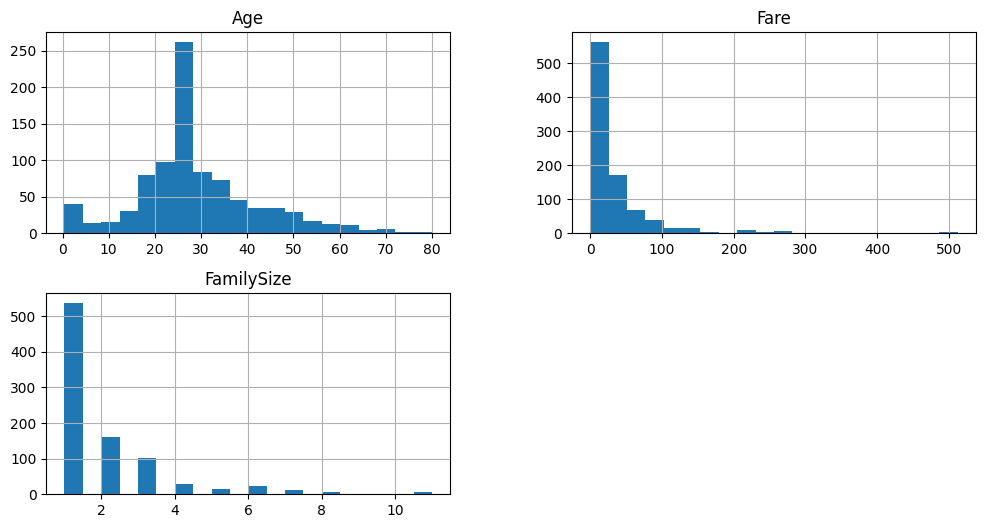

In [11]:
import matplotlib.pyplot as plt

df_final[['Age', 'Fare', 'FamilySize']].hist(bins=20, figsize=(12,6))
plt.show()


# Scatter Plot
Let’s visualize the relationship between Age and Fare, colored by Survived status:

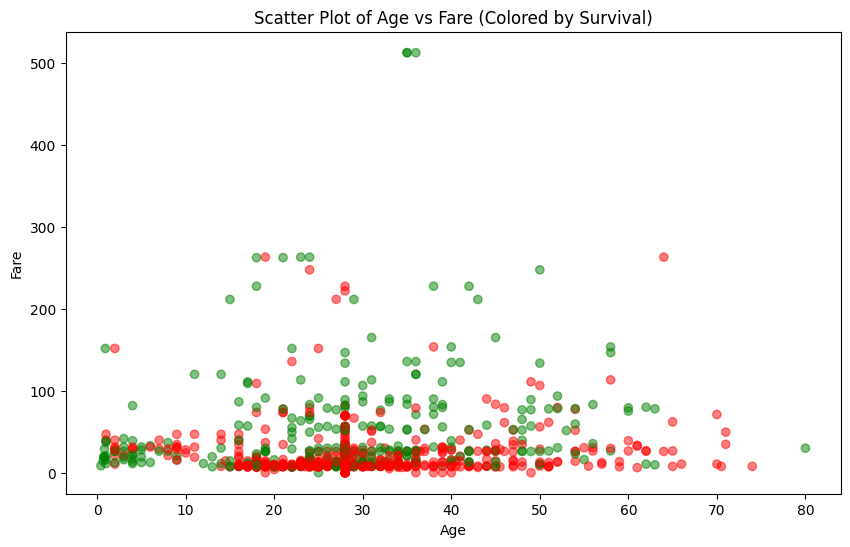

In [12]:
plt.figure(figsize=(10,6))
colors = {0: 'red', 1: 'green'}
plt.scatter(df_final['Age'], df_final['Fare'], c=df_final['Survived'].map(colors), alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare (Colored by Survival)')
plt.show()


#Observation:
What you’re seeing:
Each dot represents one passenger.

X-axis: Age of passenger.

Y-axis: Fare paid for the ticket.

Color:

Green = Survived (1)

Red = Did not survive (0)

Alpha (transparency): Helps to see overlapping points.

Insights:
Younger passengers and those who paid higher fares tend to have more green dots (survived).

Many red dots (did not survive) cluster around lower fares and middle to older ages.

There are a few passengers who paid very high fares but did not survive (red dots high on Y-axis).

This suggests Fare and Age may be correlated with survival.



#Box Plot
Compare Fare distribution by Survival status (Survived=1 or 0):

<Figure size 800x500 with 0 Axes>

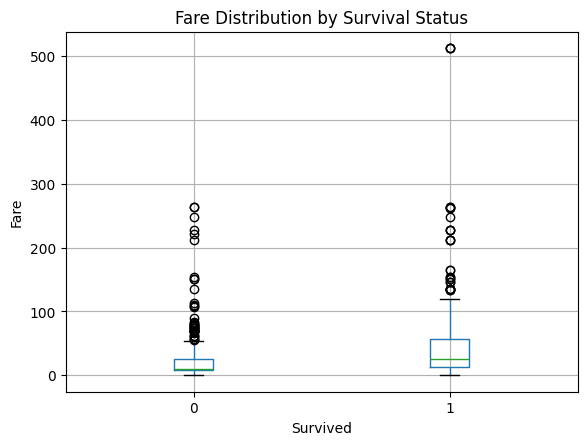

In [13]:
plt.figure(figsize=(8,5))
df_final.boxplot(column='Fare', by='Survived')
plt.title('Fare Distribution by Survival Status')
plt.suptitle('')  # Removes the default subtitle
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()


#Observation:
Two boxes:

Left box (Survived=0) → passengers who died

Right box (Survived=1) → passengers who survived

Box shows median (middle line), interquartile range (box edges), and whiskers (range excluding outliers).

Dots outside whiskers are outliers.

**Insights:**

Passengers who survived generally paid higher fares (median fare is higher).

The fare distribution for non-survivors is skewed lower.

Outliers with very high fares exist mostly in the survived group.

This again indicates fare might be an important factor affecting survival.

#Both plots suggest:

Higher fare is associated with a higher chance of survival.

Younger age passengers tend to survive more (visible in scatter).

These visualizations help confirm which features are meaningful for prediction

#Correlation Heatmap
This shows how strongly numerical features relate to each other, including to the target Survived.

python
Copy


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df_final.corr()  # Compute correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1000x800 with 0 Axes>

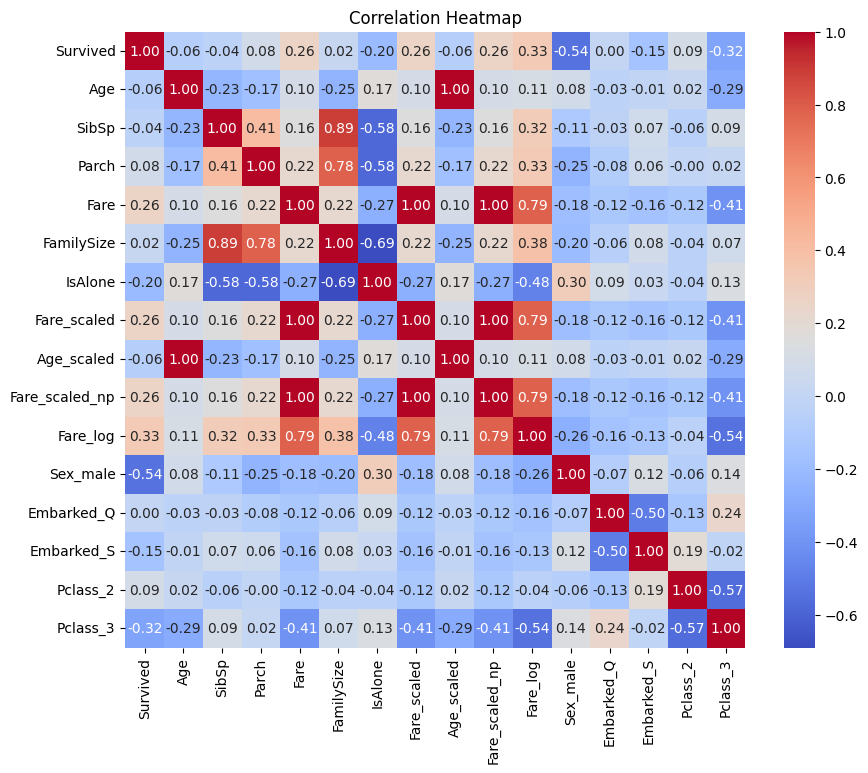

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if not already

plt.figure(figsize=(10,8))

# Select only numerical columns for correlation calculation
# You can specify columns to drop or explicitly select numerical ones
# Option 1: Drop known non-numerical columns that are not useful for correlation
numerical_df = df_final.drop(columns=['PassengerId', 'Name', 'Ticket'])

# Option 2: Select only columns with numeric data types (e.g., int, float)
# numerical_df = df_final.select_dtypes(include=np.number)


corr = numerical_df.corr()  # Compute correlation matrix on numerical data only
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Violin Plot
Visualize distribution of a numerical variable split by categories, e.g., Age by Survived:

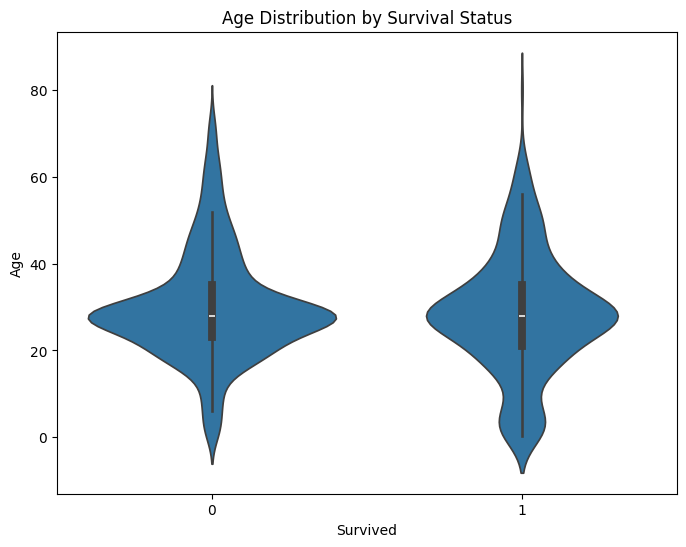

In [16]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Survived', y='Age', data=df_final)
plt.title('Age Distribution by Survival Status')
plt.show()


The violin plot shows the distribution shape of Age for survivors (1) and non-survivors (0):

Survivors tend to be younger, with a visible peak around 20-30 years.

Non-survivors have a wider age spread including older passengers.

The width of the violin at a particular age indicates how many passengers fall in that range.

Both groups have some very young children (ages near zero), but survivors have a larger proportion of younger adults.

This supports the idea that age was a factor in survival, with younger passengers more likely to survive.

#Summary:
Higher ticket class and fare positively influenced survival.

Younger age is associated with increased survival chances.

Being alone or in large families reduced survival odds.

These visualizations reinforce which features to prioritize in modeling.

#Fine-tuning and Optimization:

In [17]:
print("Memory usage before optimization:")
print(df_final.memory_usage(deep=True))
print(f"Total memory: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Memory usage before optimization:
Index               132
PassengerId        7128
Survived           7128
Name              74813
Age                7128
SibSp              7128
Parch              7128
Ticket            56802
Fare               7128
FamilySize         7128
IsAlone            7128
Fare_scaled        7128
Age_scaled         7128
Fare_scaled_np     7128
Fare_log           7128
Sex_male            891
Embarked_Q          891
Embarked_S          891
Pclass_2            891
Pclass_3            891
dtype: int64
Total memory: 0.21 MB


In [18]:
# Example for integer columns:
df_final['PassengerId'] = df_final['PassengerId'].astype('int16')
df_final['Survived'] = df_final['Survived'].astype('int8')
df_final['SibSp'] = df_final['SibSp'].astype('int8')
df_final['Parch'] = df_final['Parch'].astype('int8')
df_final['FamilySize'] = df_final['FamilySize'].astype('int8')
df_final['IsAlone'] = df_final['IsAlone'].astype('int8')

# Example for float columns:
df_final['Fare'] = df_final['Fare'].astype('float32')
df_final['Age'] = df_final['Age'].astype('float32')
df_final['Fare_scaled'] = df_final['Fare_scaled'].astype('float32')
df_final['Age_scaled'] = df_final['Age_scaled'].astype('float32')
df_final['Fare_log'] = df_final['Fare_log'].astype('float32')

print("\nMemory usage after optimization:")
print(df_final.memory_usage(deep=True))
print(f"Total memory: {df_final.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



Memory usage after optimization:
Index               132
PassengerId        1782
Survived            891
Name              74813
Age                3564
SibSp               891
Parch               891
Ticket            56802
Fare               3564
FamilySize          891
IsAlone             891
Fare_scaled        3564
Age_scaled         3564
Fare_scaled_np     7128
Fare_log           3564
Sex_male            891
Embarked_Q          891
Embarked_S          891
Pclass_2            891
Pclass_3            891
dtype: int64
Total memory: 0.16 MB


#Compare execution speeds using %%timeit in Jupyter Notebook.

pandas method

In [19]:
%%timeit
df_final['Age'].mean()


32.2 µs ± 6.19 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


NumPy array directly (usually faster)

In [20]:
%%timeit
df_final['Age'].values.mean()


15.2 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#Building a Machine Learning Model
Goal:
Predict Survival (Survived column) based on features.

Split into training and test sets

In [21]:
from sklearn.model_selection import train_test_split

# Target variable
y = df_final['Survived']

# Features: drop 'Survived' and non-predictive columns
X = df_final.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'])

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 712
Testing samples: 179


#Choose and Train a Simple Model
We’ll use Logistic Regression — simple and good for binary classification.

In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression(max_iter=1000)

# Train model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

#Evaluating the Model

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7933
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Confusion Matrix:
[[90 15]
 [22 52]]


#Accuracy: 79.33%
The model correctly predicts survival status about 79% of the time on unseen test data.

This is a solid baseline for a simple model on this dataset.

Predicted No	Predicted Yes

Actual No	90 (True Neg)	15 (False Pos)

Actual Yes	22 (False Neg)	52 (True Pos)



True Positives (52): Survivors correctly predicted.

True Negatives (90): Non-survivors correctly predicted.

False Positives (15): Predicted survivor but actually not.

False Negatives (22): Predicted non-survivor but actually survived.